In [290]:
import pandas as pd
import numpy as np
import datetime

allData = pd.read_csv("./data/train.csv")

In [291]:
allData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Cleaning

In [292]:
sizeFeatures = [
    "MSSubClass", "Utilities", "BldgType", "TotalBsmtSF", "LowQualFinSF",
    "GrLivArea", "FullBath", "HalfBath", "TotRmsAbvGrd",
    "Fireplaces", "GarageArea"
]

locationFeatures = [
    "MSZoning", "LotFrontage", "LotArea", "Street",
    "LandContour", "LotConfig", "LandSlope", "Neighborhood", "Condition1",
    "YearBuilt", "YearRemodAdd", "Heating", "Functional", "PavedDrive"
]

targetFeature = ["SalePrice"]

selectedData = allData[sizeFeatures + locationFeatures + ["SalePrice"]]







# Preprocessing the data:

In [293]:
numericalFeatures = ["MSSubClass", "TotalBsmtSF", "LowQualFinSF",
    "GrLivArea", "FullBath", "HalfBath", "TotRmsAbvGrd",
    "Fireplaces", "GarageArea", "LotFrontage", "LotArea", "GrLivArea"]

# replace N/A with 0.
for column in numericalFeatures:
    selectedData.fillna({column: 0}, inplace=True)

#convert categorical data to numerical
selectedData = pd.get_dummies(selectedData) 


/tmp/ipykernel_18889/1991822212.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectedData.fillna({column: 0}, inplace=True)


In [294]:
from sklearn.neighbors import KNeighborsRegressor


from sklearn.model_selection import train_test_split

trainingData, testData_with_target = train_test_split(selectedData, test_size=0.2)

#separate the target from the trainingdata
trainingTarget = trainingData["SalePrice"]
trainingData = trainingData.drop("SalePrice", axis=1) 



# Now measure performance

RMSE 43014.35908270903 k: 2
RMSE 40055.51318412352 k: 4
RMSE 40335.3212285171 k: 8
RMSE 41590.75422421557 k: 16
RMSE 46141.894927300185 k: 32
RMSE 51128.94921386321 k: 64
RMSE 56789.26112738898 k: 128
RMSE 62361.862908900075 k: 256


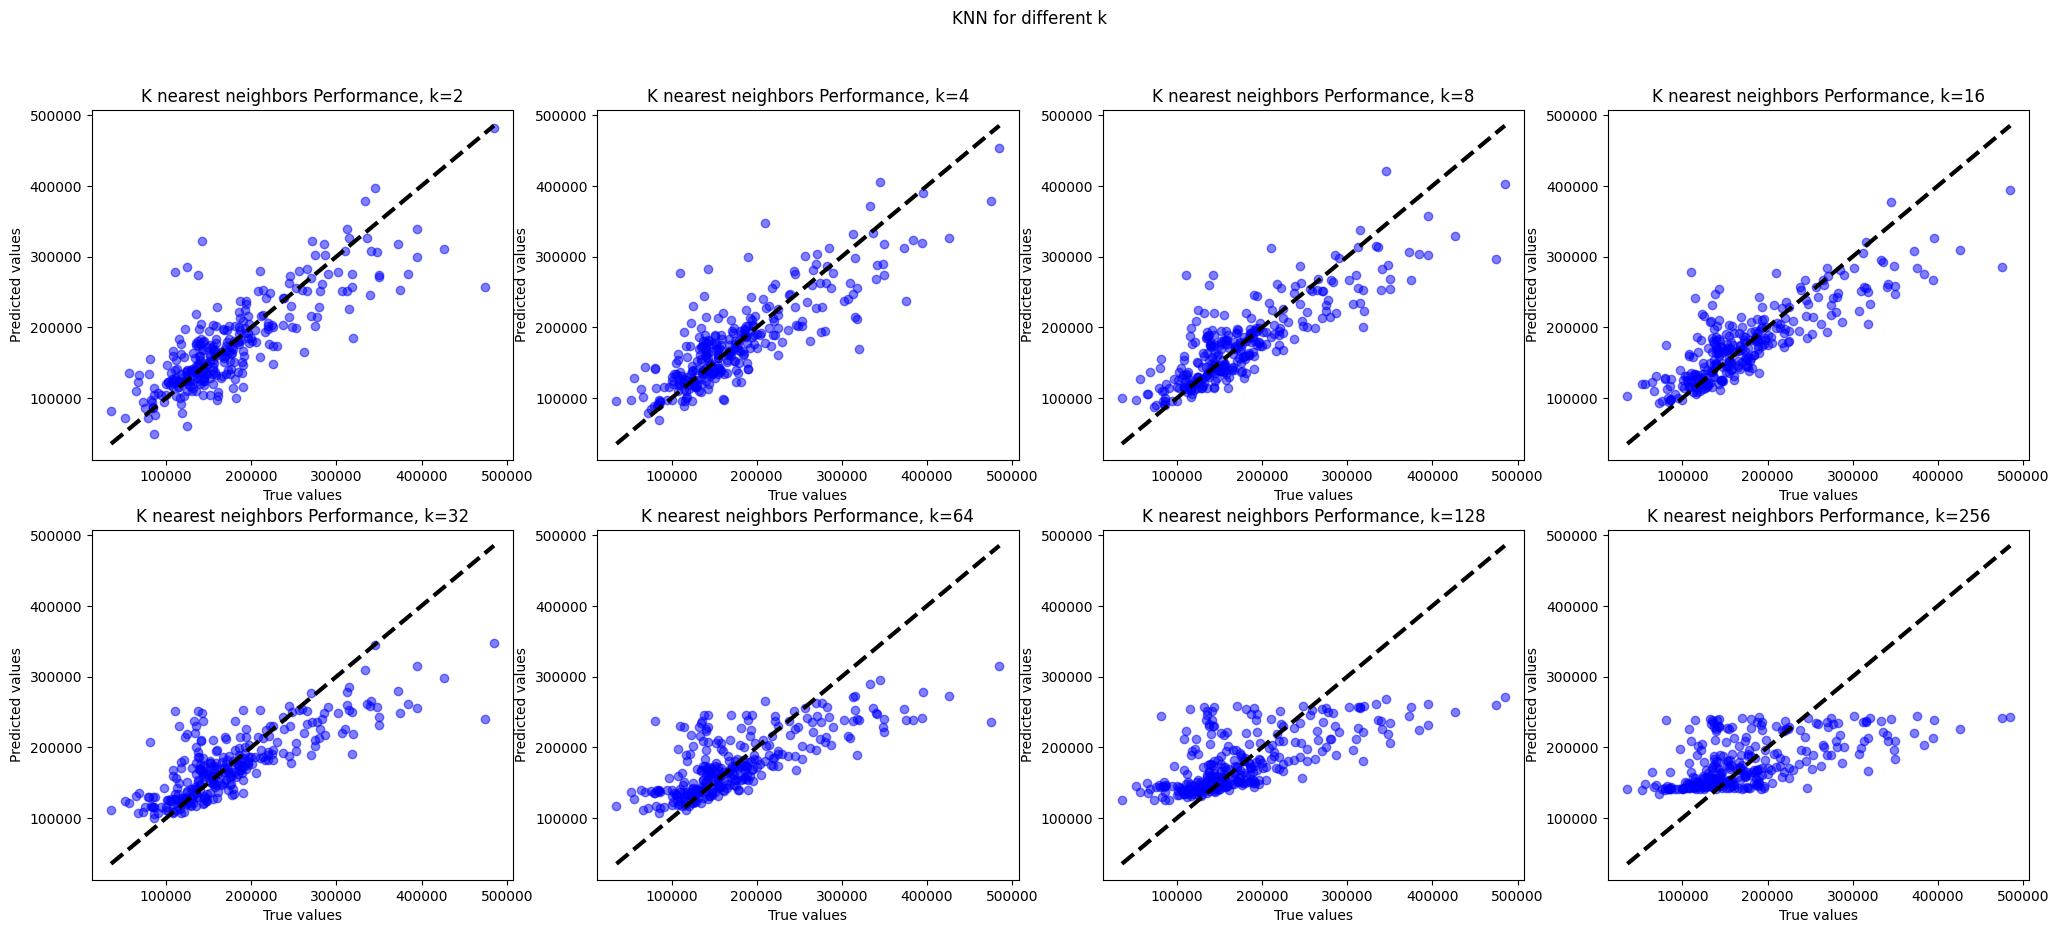

In [301]:
from sklearn.metrics import root_mean_squared_error


testTarget = testData_with_target["SalePrice"]
testData = testData_with_target.drop('SalePrice', axis=1)

import matplotlib.pyplot as plt

plotsWidth = 4
plotsHeight = 2

fig, axs = plt.subplots(plotsHeight, plotsWidth, figsize=(25, 10))
fig.suptitle('KNN for different k')

k =2
for y in range(0, plotsHeight):
    for x in range(0, plotsWidth):
        subplot = axs[y, x]

        KNNregressor = KNeighborsRegressor(n_neighbors=k)
        KNNregressor.fit(trainingData, trainingTarget)
        predictions = KNNregressor.predict(testData)
        subplot.plot(testTarget, predictions, 'bo', alpha=0.5)
        subplot.plot([testTarget.min(), testTarget.max()], [testTarget.min(), testTarget.max()], 'k--', lw=3)  # Diagonal line
        title = 'K nearest neighbors Performance, k=' + str(k)
        subplot.set_title(title)
        subplot.set(xlabel="True values", ylabel="Predicted values")
        RMSE = root_mean_squared_error(testTarget, predictions)
        print("RMSE", RMSE, "k:" , k)
        k *= 2
